<h2>Word processing via NLTK<h2>

<h3>Importing the required Library</h3>

In [6]:
import requests
import re
import urllib.request
import time
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize

<h3> Parse the File</h3>

In [7]:
url = "https://en.wikipedia.org/wiki/Gila_monster"
response = requests.get(url)
soup = BeautifulSoup(response.text,"html.parser")
raw_text = soup.get_text(strip = True)
raw_text

'Gila monster - WikipediaGila monsterFrom Wikipedia, the free encyclopediaJump to navigationJump to searchLargest living species of lizard in the United StatesGila monsterConservation statusNear Threatened(IUCN 3.1)[1]CITESAppendix II(CITES)[2]Scientific classificationKingdom:AnimaliaPhylum:ChordataClass:ReptiliaOrder:SquamataFamily:HelodermatidaeGenus:HelodermaSpecies:H.\xa0suspectumBinomial nameHeloderma suspectumCope, 1869A Gila monsterTheGila monster(Heloderma suspectum,/ˈhiːlə/HEE-lə) is a species ofvenomouslizardnative to theSouthwestern United Statesand the northwesternMexicanstate ofSonora. It is a heavy, typically slow-moving reptile, up to 56 centimetres (22\xa0in) long, and it is the only venomous lizard native to the United States. Its venomous close relatives, the fourbeaded lizards(all former subspecies ofHeloderma horridum) inhabit Mexico and Guatemala.[3][4]The Gila monster is sluggish in nature, so it is not generally dangerous and very rarely poses a real threat to hu

<h3>Tokenizing the Data</h3>

In [8]:
tokens = re.split('\W+',raw_text)
tokens

['Gila',
 'monster',
 'WikipediaGila',
 'monsterFrom',
 'Wikipedia',
 'the',
 'free',
 'encyclopediaJump',
 'to',
 'navigationJump',
 'to',
 'searchLargest',
 'living',
 'species',
 'of',
 'lizard',
 'in',
 'the',
 'United',
 'StatesGila',
 'monsterConservation',
 'statusNear',
 'Threatened',
 'IUCN',
 '3',
 '1',
 '1',
 'CITESAppendix',
 'II',
 'CITES',
 '2',
 'Scientific',
 'classificationKingdom',
 'AnimaliaPhylum',
 'ChordataClass',
 'ReptiliaOrder',
 'SquamataFamily',
 'HelodermatidaeGenus',
 'HelodermaSpecies',
 'H',
 'suspectumBinomial',
 'nameHeloderma',
 'suspectumCope',
 '1869A',
 'Gila',
 'monsterTheGila',
 'monster',
 'Heloderma',
 'suspectum',
 'ˈhiːlə',
 'HEE',
 'lə',
 'is',
 'a',
 'species',
 'ofvenomouslizardnative',
 'to',
 'theSouthwestern',
 'United',
 'Statesand',
 'the',
 'northwesternMexicanstate',
 'ofSonora',
 'It',
 'is',
 'a',
 'heavy',
 'typically',
 'slow',
 'moving',
 'reptile',
 'up',
 'to',
 '56',
 'centimetres',
 '22',
 'in',
 'long',
 'and',
 'it',
 'is'

<h3>Import NLTK </h3>

In [11]:
import nltk
from nltk.probability import FreqDist
#fdist = FreqDist(tokens)

<h3>Finding the frequently use words</h3>

In [12]:
freqToken = FreqDist(tokens)
print(freqToken)
freqToken.most_common(10)

<FreqDist with 2419 samples and 5718 outcomes>


[('the', 225),
 ('of', 156),
 ('and', 130),
 ('to', 106),
 ('Gila', 105),
 ('in', 94),
 ('a', 84),
 ('monster', 67),
 ('The', 58),
 ('is', 53)]

<h3>Visualize the Data <h3>

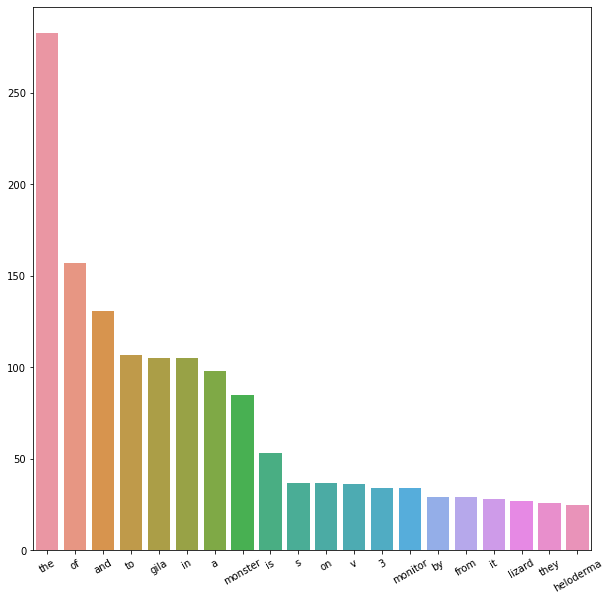

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Creating FreqDist, keeping the 20 most common tokens
all_fdist = FreqDist(tokens).most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30);

<h3> Word Cloud</h3>

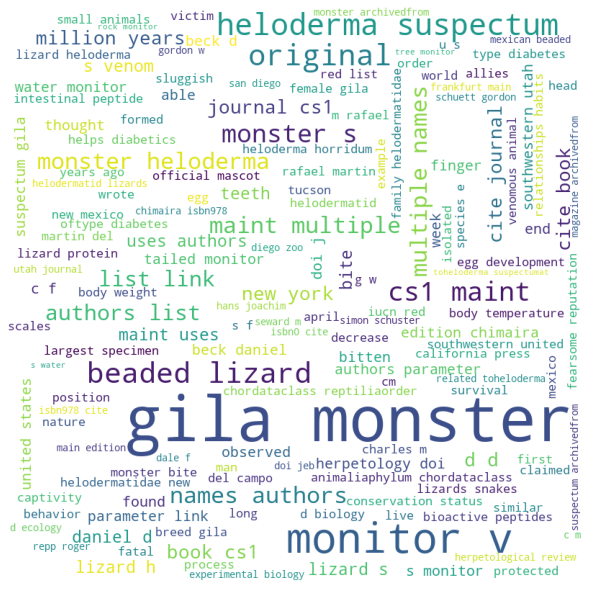

In [17]:
from wordcloud import WordCloud, STOPWORDS
 
comment_words = ''
stopwords = set(STOPWORDS)

# Converts each token into lowercase
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
    
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<h3>Sentiment processing via NLTK:</h3>

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
score = SentimentIntensityAnalyzer().polarity_scores(raw_text)
neg = score['neg']
pos = score['pos']
print(score)
if neg > pos:
    print("Negative Sentiment")
elif pos > neg:
    print("Positive Sentiment")
else:
    print("Neutral Vibe")

{'neg': 0.061, 'neu': 0.867, 'pos': 0.073, 'compound': 0.9909}
Positive Sentiment
